In [97]:
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.utils import np_utils
import random

import matplotlib.pyplot as plt

In [98]:
base_path = "images"
dirs = os.listdir("images")

In [99]:
print(dirs)

['cats', 'dogs', 'horses', 'humans']


In [100]:
folder_path = ""

In [101]:
image_data = []

In [102]:
labels = []

In [103]:
label_dict = {'cats':0,'dogs':1,'horses':2,'humans':3}

In [104]:
for ix in dirs:
    path = os.path.join(base_path,ix)
    img_data = os.listdir(path)
    for im in img_data:
        img = image.load_img(os.path.join(path,im),target_size=(224,224))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [105]:
print(len(image_data), len(labels))

808 808


In [106]:
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [107]:
X_train = np.array(image_data)
Y_train = np.array(labels)

print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808,)


In [108]:
Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808, 4)


In [109]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [110]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [111]:
avg_pool_1 = GlobalAveragePooling2D()(model.output)
fc_layer_1 = Dense(256,activation='relu')(avg_pool_1)
drop_1 = Dropout(0.5)(fc_layer_1)
fc_layer_2 = Dense(4,activation='softmax')(drop_1)

model_new = Model(inputs=model.input, outputs= fc_layer_2)
model_new.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [112]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [113]:
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000014B81A2F788>
1 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x0000014B81A2F108>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000014B81A2EFC8>
3 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x0000014B81A2E8C8>
4 <tensorflow.python.keras.layers.core.Activation object at 0x0000014B81A28DC8>
5 <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x0000014B91AA2CC8>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000014B81A55108>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000014B81A6A7C8>
8 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x0000014B81A7B108>
9 <tensorflow.python.keras.layers.core.Activation object at 0x0000014B81A7B7C8>
10 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000014B81A80708>
11 <tensorflow.python.keras.

In [114]:
for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_new.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [115]:
hist = model_new.fit(X_train,Y_train,
                    shuffle = True,
                    batch_size = 16,
                    epochs = 5,
                    validation_split=0.20
                    )

Epoch 1/5
41/41 [==============================] - 37s 891ms/step - loss: 1.0989 - accuracy: 0.5573 - val_loss: 0.4184 - val_accuracy: 0.8704
Epoch 2/5
41/41 [==============================] - 42s 1s/step - loss: 0.5129 - accuracy: 0.8034 - val_loss: 0.2426 - val_accuracy: 0.9321
Epoch 3/5
41/41 [==============================] - 41s 1s/step - loss: 0.3079 - accuracy: 0.9025 - val_loss: 0.1762 - val_accuracy: 0.9630
Epoch 4/5
41/41 [==============================] - 41s 1s/step - loss: 0.2664 - accuracy: 0.9087 - val_loss: 0.1449 - val_accuracy: 0.9630
Epoch 5/5
41/41 [==============================] - 41s 1000ms/step - loss: 0.1863 - accuracy: 0.9458 - val_loss: 0.1182 - val_accuracy: 0.9691


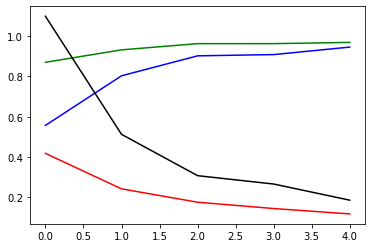

In [116]:
plt.figure(0)
plt.plot(hist.history['accuracy'],'blue')
plt.plot(hist.history['val_accuracy'],'green')
plt.plot(hist.history['loss'],'black')
plt.plot(hist.history['val_loss'],'red')
plt.show()